# Setup

In [1]:
import glob
import pandas as pd

In [2]:
import calendar
import datetime
from datetime import timedelta

def get_range_of_week(year, calendar_week):       
    monday = datetime.datetime.strptime(f'{year}-{calendar_week}-1', "%Y-%W-%w").date()
    return pd.Series([str(monday), str(monday + datetime.timedelta(days=6.9))], index=['week_start', 'week_end'])

# Load all files

In [3]:
list_of_files = glob.glob('../data//archive/*_variants_of_concern_sample.csv')

In [4]:
list_of_files

['../data//archive\\2021-05-12_variants_of_concern_sample.csv',
 '../data//archive\\2021-05-19_variants_of_concern_sample.csv',
 '../data//archive\\2021-05-26_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-02_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-09_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-16_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-23_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-30_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-07_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-14_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-22_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-29_variants_of_concern_sample.csv',
 '../data//archive\\2021-08-05_variants_of_concern_sample.csv',
 '../data//archive\\2021-08-12_variants_of_concern_sample.csv',
 '../data//archive\\2021-08-19_variants_of_concern_sample.csv',
 '../data//archive\\2021-08-26_variants_

In [5]:
dates = [f.split('\\')[1].split('_')[0] for f in list_of_files]

Load each file and add date of availability as column

In [6]:
df_all = pd.DataFrame()

for i, d in enumerate(dates):
    df = pd.read_csv(list_of_files[i])
    df['seq_available'] = d
    df_all = df_all.append(df, ignore_index=True)

# Data preparation

In [7]:
df_all.drop(columns=['total_count', 'total_proportion'], inplace=True)

In [8]:
# df_all['max_count'] = df_all[[c for c in df_all.columns if 'count' in c]].max(axis=1)
# df_all['max_proportion'] = df_all[[c for c in df_all.columns if 'proportion' in c]].max(axis=1)

# df_all['total_count'] = round(100*df_all.max_count / df_all.max_proportion).astype(int)

# df_all.drop(columns=['max_count', 'max_proportion'], inplace=True)

Get start and end date of the given weeks

In [9]:
df_all = df_all.join(df_all.apply(lambda x: get_range_of_week(2021, x['week']), axis=1))

Reorder columns

In [10]:
df_all = df_all[['seq_available', 'week', 'week_start', 'week_end', 'B.1.1.7_count', 'B.1.1.7_proportion', 'B.1.351_count',
       'B.1.351_proportion', 'B.1.617.1_count', 'B.1.617.1_proportion',
       'B.1.617.2_count', 'B.1.617.2_proportion', 'P.1_count',
       'P.1_proportion']]

In [11]:
df_all.tail()

,seq_available,week,week_start,week_end,B.1.1.7_count,B.1.1.7_proportion,B.1.351_count,B.1.351_proportion,B.1.617.1_count,B.1.617.1_proportion,B.1.617.2_count,B.1.617.2_proportion,P.1_count,P.1_proportion
454,2021-09-09,30,2021-07-26,2021-08-01,NaN,1.8,NaN,0.0,NaN,NaN,NaN,97.4,NaN,0.1
455,2021-09-09,31,2021-08-02,2021-08-08,NaN,1.1,NaN,0.0,NaN,NaN,NaN,98.6,NaN,0.1
456,2021-09-09,32,2021-08-09,2021-08-15,NaN,0.4,NaN,0.0,NaN,NaN,NaN,99.1,NaN,0.1
457,2021-09-09,33,2021-08-16,2021-08-22,NaN,0.4,NaN,0.0,NaN,NaN,NaN,99.4,NaN,0.0
458,2021-09-09,34,2021-08-23,2021-08-29,NaN,0.2,NaN,0.0,NaN,NaN,NaN,99.7,NaN,0.0


# Export

In [12]:
df_all.to_csv('../data/sequencing_germany.csv'.format(df_all.seq_available.max()), index=False)

# Plot

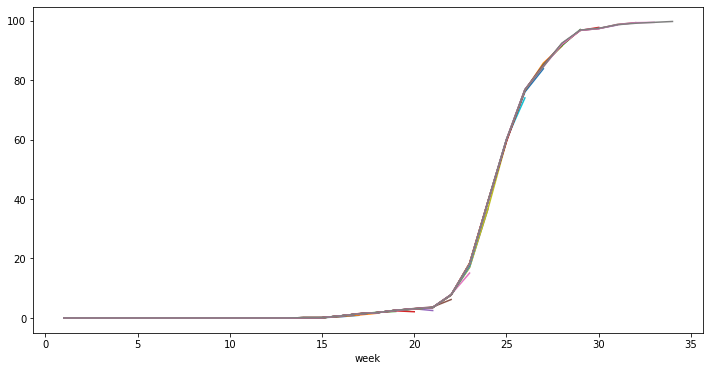

In [13]:
df_all.set_index('week').groupby(['seq_available'])['B.1.617.2_proportion'].plot(figsize=[12, 6]);